<a href="https://colab.research.google.com/github/rnrrmr/image_classification/blob/main/final4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from keras.preprocessing import image as image_utils
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
# from tensorflow.keras.preprocessing import image as image_utils
# from tensorflow.keras.applications.imagenet_utils import preprocess_input

In [ ]:
data_dir = "/content/drive/MyDrive/weather-dataset/dataset"

#Base Model

train_datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
    )

training_set = train_datagen.flow_from_directory(data_dir,
                                                 target_size=(128, 128),
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 subset='training')

validation_set = train_datagen.flow_from_directory(data_dir,
                                                   target_size=(128, 128),
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   subset='validation')

Found 4950 images belonging to 11 classes.
Found 1230 images belonging to 11 classes.


In [ ]:
class_labels = os.listdir(data_dir)
print(class_labels)  # 클래스 라벨 확인

['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']


In [ ]:
#Initializing the Convolutional Neural Network

model1=Sequential()
model1.add(keras.layers.Conv2D(32, kernel_size=(3, 3),input_shape=(128,128,3), activation='relu'))
model1.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))
model1.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))
model1.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(11, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0

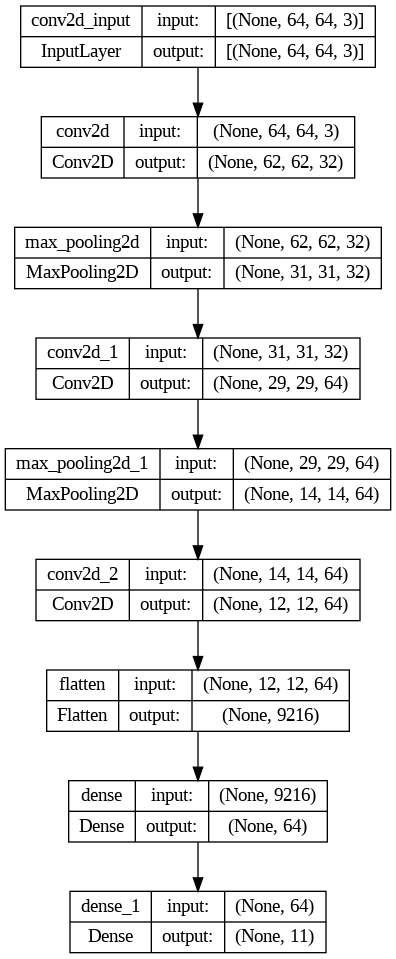

In [ ]:
plot_model(model1, show_shapes=True, show_layer_names=True)

In [ ]:
model1.compile(loss='categorical_crossentropy',
               optimizer='adam', metrics=['accuracy'])

가중치 변경해서 도전

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
# 클래스 가중치 변경 - 이미지마다 가중치를 다를게 적용

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(training_set.classes), y=training_set.classes)
model1.fit(training_set,
           epochs=20,
           validation_data=validation_set,
           class_weight=class_weights)

In [ ]:
# Starting the model training
history = model1.fit(training_set,
                     epochs=20,
                     validation_data=validation_set)

Epoch 1/20
155/155 [==============================] - 2796s 18s/step - loss: 1.6938 - accuracy: 0.4626 - val_loss: 1.2094 - val_accuracy: 0.6187
Epoch 2/20
155/155 [==============================] - 24s 153ms/step - loss: 1.0848 - accuracy: 0.6394 - val_loss: 1.0486 - val_accuracy: 0.6593
Epoch 3/20
155/155 [==============================] - 24s 155ms/step - loss: 0.9200 - accuracy: 0.6883 - val_loss: 1.0873 - val_accuracy: 0.6797
Epoch 4/20
155/155 [==============================] - 25s 159ms/step - loss: 0.7535 - accuracy: 0.7459 - val_loss: 0.9712 - val_accuracy: 0.7024
Epoch 5/20
155/155 [==============================] - 25s 164ms/step - loss: 0.6173 - accuracy: 0.7958 - val_loss: 1.0755 - val_accuracy: 0.6577
Epoch 6/20
155/155 [==============================] - 24s 155ms/step - loss: 0.4778 - accuracy: 0.8390 - val_loss: 1.1817 - val_accuracy: 0.6772
Epoch 7/20
155/155 [==============================] - 24s 155ms/step - loss: 0.3494 - accuracy: 0.8863 - val_loss: 1.3441 - val_ac

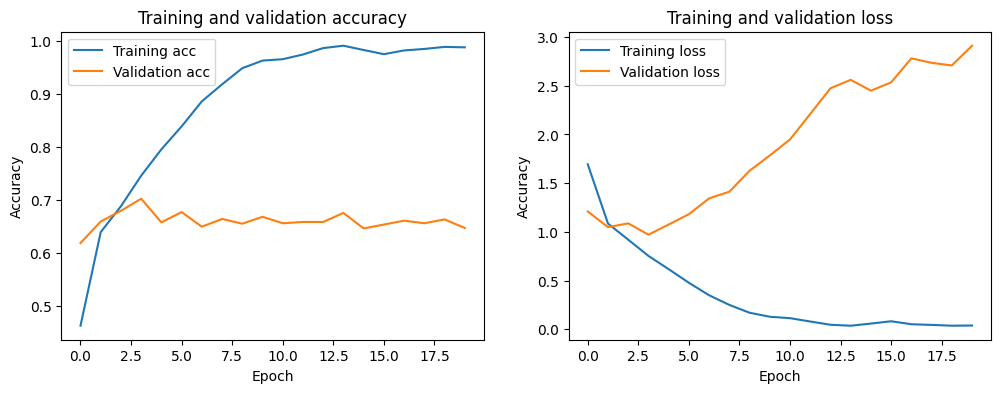

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training acc')
plt.plot(history.history['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# 테스트용 데이터 로드
test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # 이미지 값을 [0, 1] 범위로 정규화

test_data_dir = "/content/drive/MyDrive/weather-dataset/test_data"

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(128, 128),  # 이미지 크기를 조정 (학습과 동일한 크기로 설정)
    batch_size=32,  # 배치 크기는 학습과 동일하게 설정
    class_mode='categorical',  # 다중 클래스 분류
)

# 모델 평가
test_loss, test_accuracy = model1.evaluate(test_generator, verbose=1)
print("Test accuracy:", test_accuracy)

Found 682 images belonging to 11 classes.
22/22 [==============================] - 271s 13s/step - loss: 2.7521 - accuracy: 0.6481
Test accuracy: 0.6480938196182251


1/1 [==============================] - 0s 19ms/step


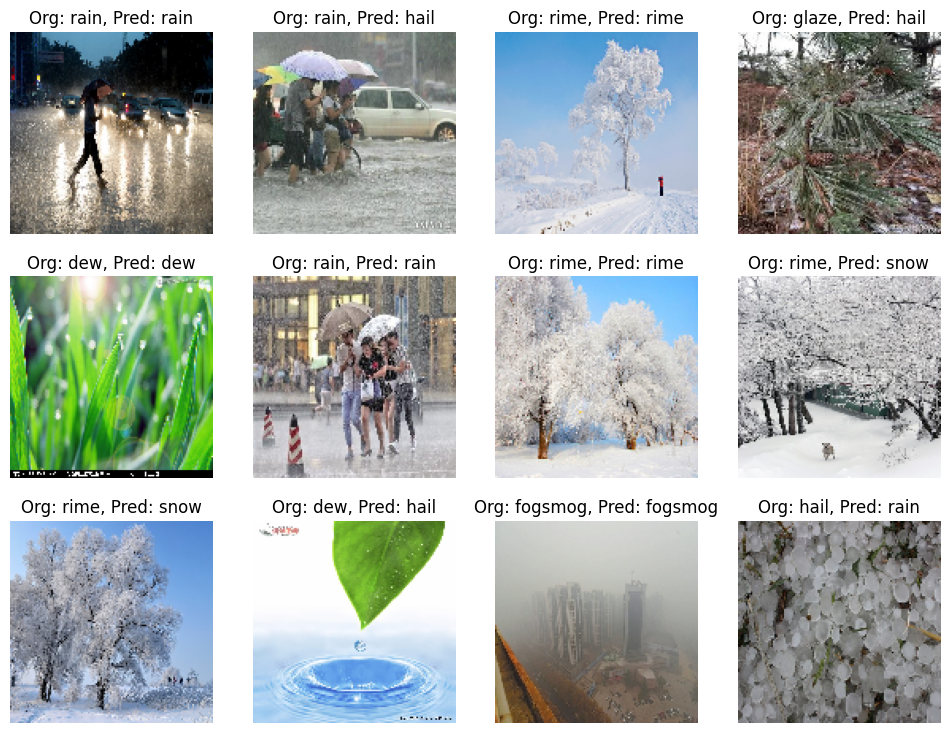

In [ ]:
import numpy as np

i = 1
plt.figure(figsize=(12, 9))
for images, labels in test_generator:
    id = np.random.randint(len(images))
    image, label = images[id], np.argmax(labels[id])  # 정답 클래스 인덱스 추출
    pred_label_index = np.argmax(model1.predict(image[np.newaxis, ...]))  # 예측 클래스 인덱스 추출
    pred_label = class_labels[pred_label_index]  # 예측 클래스 이름 가져오기

    plt.subplot(3, 4, i)
    plt.imshow(image)
    plt.title(f"Org: {class_labels[label]}, Pred: {pred_label}")
    plt.axis('off')

    i += 1
    if i >= 13:
        break

plt.show()


1/1 [==============================] - 0s 19ms/step


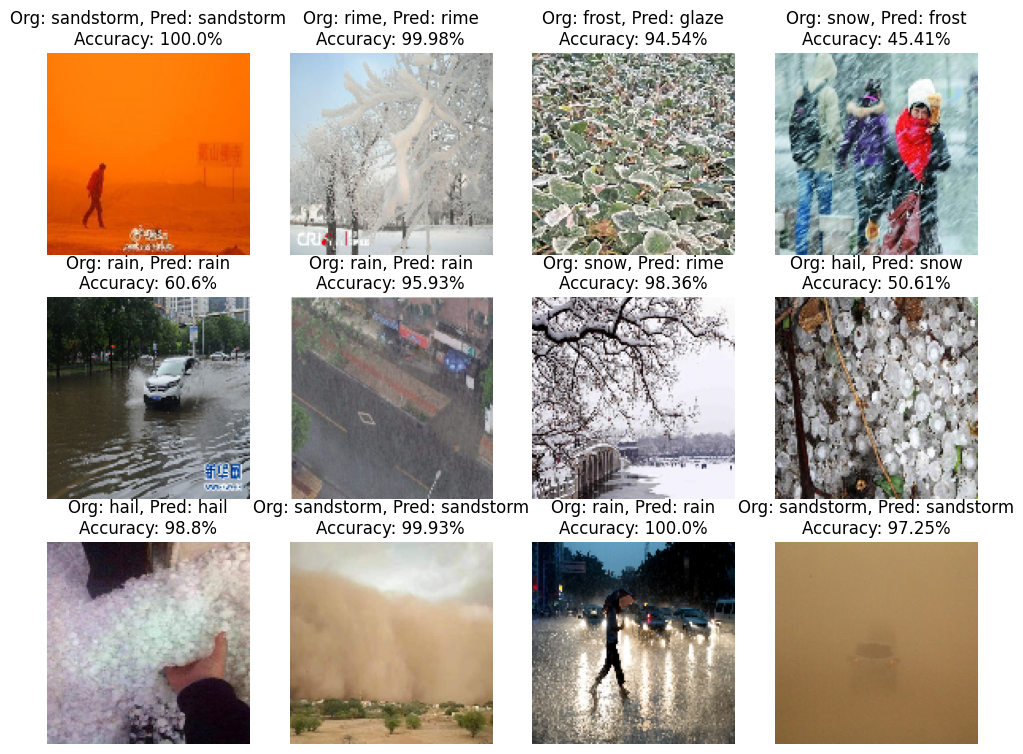

In [ ]:
# 이거로 돌려서 정확도까지 같이 나올수있
import numpy as np

i = 1
plt.figure(figsize=(12, 9))
for images, labels in test_generator:
    id = np.random.randint(len(images))
    image, label = images[id], np.argmax(labels[id])  # 정답 클래스 인덱스 추출
    pred_label_index = np.argmax(model1.predict(image[np.newaxis, ...]))  # 예측 클래스 인덱스 추출
    pred_label = class_labels[pred_label_index]  # 예측 클래스 이름 가져오기

    # 모델의 예측 정확도 계산
    correct = label == pred_label_index
    accuracy = round(model1.predict(image[np.newaxis, ...]).max() * 100, 2)

    plt.subplot(3, 4, i)
    plt.imshow(image)
    plt.title(f"Org: {class_labels[label]}, Pred: {pred_label}\nAccuracy: {accuracy}%")
    plt.axis('off')

    i += 1
    if i >= 13:
        break

plt.show()

1/1 [==============================] - 0s 23ms/step


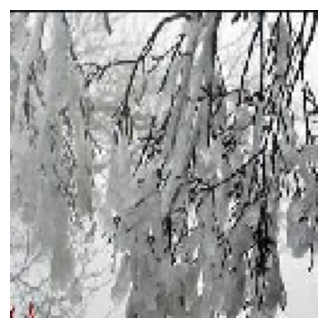

Class: dew, Probability: 0.0000
Class: fogsmog, Probability: 0.0000
Class: frost, Probability: 0.0000
Class: glaze, Probability: 0.9905
Class: hail, Probability: 0.0000
Class: lightning, Probability: 0.0000
Class: rain, Probability: 0.0000
Class: rainbow, Probability: 0.0000
Class: rime, Probability: 0.0095
Class: sandstorm, Probability: 0.0000
Class: snow, Probability: 0.0000


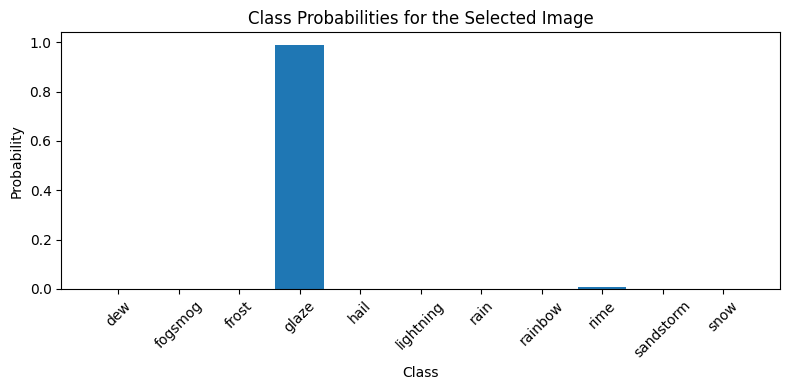

In [ ]:
# 테스트 데이터셋에서 무작위로 이미지 선택
id = np.random.randint(len(test_generator))
image, label = test_generator[id]

predictions = model1.predict(image) # 이미지를 모델에 입력하여 예측 확률 계산
# 예측 결과를 클래스 라벨과 확률로 매핑
class_probabilities = [(class_labels[i], prob) for i, prob in enumerate(predictions[0])]

# 선택한 이미지를 출력
plt.figure(figsize=(4, 4))
plt.imshow(image[13])
plt.axis('off')
plt.show()

# 각 클래스로 예측된 데이터 확률 출력
for class_label, prob in class_probabilities:
    print(f"Class: {class_label}, Probability: {prob:.4f}")

# 클래스 라벨과 확률을 따로 저장
labels, probabilities = zip(*class_probabilities)

# 그래프를 그리기 위한 설정
plt.figure(figsize=(8, 4))
plt.bar(labels, probabilities)
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Class Probabilities for the Selected Image')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
# class_weights = class_weight.compute_class_weight('balanced')
from sklearn.utils.class_weight import compute_class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(training_set.classes), y=training_set.classes)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

In [ ]:
#Initializing the Convolutional Neural Network

model2=Sequential()
model2.add(keras.layers.Conv2D(32, kernel_size=(3, 3),input_shape=(128,128,3), activation='relu'))
model2.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))
model2.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))
model2.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(11, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 50176)            

In [ ]:
model2.compile(loss='categorical_crossentropy',
               optimizer='adam', metrics=['accuracy'])

In [ ]:
history2 = model2.fit(training_set,
                      epochs=20,
                      validation_data=validation_set,
                      class_weight=class_weights_dict)

Epoch 1/20
155/155 [==============================] - 25s 150ms/step - loss: 1.7755 - accuracy: 0.3863 - val_loss: 1.1900 - val_accuracy: 0.5967
Epoch 2/20
155/155 [==============================] - 24s 154ms/step - loss: 1.1903 - accuracy: 0.6012 - val_loss: 1.1839 - val_accuracy: 0.6333
Epoch 3/20
155/155 [==============================] - 25s 163ms/step - loss: 1.0179 - accuracy: 0.6618 - val_loss: 1.1216 - val_accuracy: 0.6350
Epoch 4/20
155/155 [==============================] - 24s 156ms/step - loss: 0.8889 - accuracy: 0.6952 - val_loss: 1.0084 - val_accuracy: 0.6951
Epoch 5/20
155/155 [==============================] - 24s 156ms/step - loss: 0.7279 - accuracy: 0.7475 - val_loss: 1.0558 - val_accuracy: 0.6764
Epoch 6/20
155/155 [==============================] - 25s 160ms/step - loss: 0.5555 - accuracy: 0.8051 - val_loss: 1.1721 - val_accuracy: 0.6488
Epoch 7/20
155/155 [==============================] - 25s 159ms/step - loss: 0.4344 - accuracy: 0.8477 - val_loss: 1.1210 - val_ac

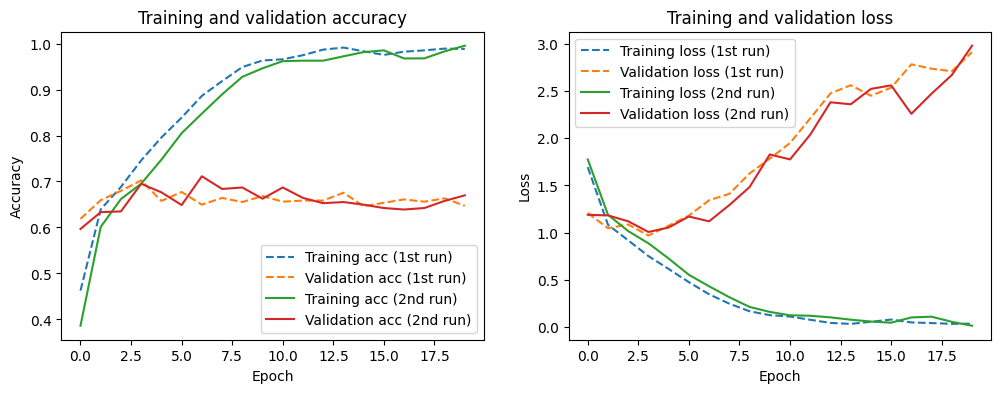

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training acc (1st run)', linestyle='--')  # 첫 번째 실행 결과
plt.plot(history.history['val_accuracy'], label='Validation acc (1st run)', linestyle='--')  # 첫 번째 실행 결과
plt.plot(history2.history['accuracy'], label='Training acc (2nd run)')  # 두 번째 실행 결과
plt.plot(history2.history['val_accuracy'], label='Validation acc (2nd run)')  # 두 번째 실행 결과
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss (1st run)', linestyle='--')  # 첫 번째 실행 결과
plt.plot(history.history['val_loss'], label='Validation loss (1st run)', linestyle='--')  # 첫 번째 실행 결과
plt.plot(history2.history['loss'], label='Training loss (2nd run)')  # 두 번째 실행 결과
plt.plot(history2.history['val_loss'], label='Validation loss (2nd run)')  # 두 번째 실행 결과

plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# 테스트용 데이터 로드
test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # 이미지 값을 [0, 1] 범위로 정규화

test_data_dir = "/content/drive/MyDrive/weather-dataset/test_data"

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(128, 128),  # 이미지 크기를 조정 (학습과 동일한 크기로 설정)
    batch_size=32,  # 배치 크기는 학습과 동일하게 설정
    class_mode='categorical',  # 다중 클래스 분류
)

# 모델 평가
test_loss, test_accuracy = model2.evaluate(test_generator, verbose=1)
print("Test accuracy:", test_accuracy)

Found 682 images belonging to 11 classes.
22/22 [==============================] - 3s 115ms/step - loss: 2.8628 - accuracy: 0.6818
Test accuracy: 0.6818181872367859


In [ ]:
# 이미지를 모델에 입력하여 예측 확률 계산
predictions = model1.predict(image)

# 예측 결과를 클래스 라벨과 확률로 매핑
class_probabilities = [(class_labels[i], prob) for i, prob in enumerate(predictions[0])]

    # 모델의 예측 정확도 계산
    correct = label == pred_label_index
    accuracy = round(model1.predict(image[np.newaxis, ...]).max() * 100, 2)

    plt.subplot(3, 4, i)
    plt.imshow(image)
    plt.title(f"Org: {class_labels[label]}, Pred: {pred_label}\nAccuracy: {accuracy}%")
    plt.axis('off')

    i += 1
    if i >= 13:
        break

plt.show()


In [ ]:
# 클래스 불균형을 고려하여 클래스 가중치 계산
# class_weights = class_weight.compute_class_weight('balanced', np.unique(train_labels), train_labels)

class_weights = class_weight.compute_class_weight('balanced', np.unique(training_set.classes), training_set.classes)
model1.fit(training_set,
           epochs=15,
           validation_data=validation_set,
           class_weight=class_weights)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    folder_name = os.path.dirname(image_path)

    # 이미지 불러오기 및 전처리
    image = image_utils.load_img(image_path, target_size=(128, 128))
    image = image_utils.img_to_array(image)
    image = image.reshape(1, 128, 128, 3)
    image = preprocess_input(image)

    # 모델로 예측 수행
    preds = model1.predict(image)

    # 클래스 인덱스와 예측 확률 추출
    predicted_class_index = np.argmax(preds)

    # 클래스명 가져오기
    predicted_class = class_labels[predicted_class_index]

    # 이미지 시각화
    show_image(image_path)

    # 예측 결과 출력
    print(f"Folder name: {folder_name}")
    print(f"Predicted class index: {predicted_class_index}")
    print(f"Predicted class name: {predicted_class}")
    print(f"Probability: {preds[0][predicted_class_index]*100:.3f}%")

    return preds

In [ ]:
make_predictions("/content/drive/MyDrive/weather-dataset/test_data/dew/2211.jpg")

In [ ]:
make_predictions("/content/drive/MyDrive/weather-dataset/test_data/fogsmog/4252.jpg")

In [ ]:
make_predictions("/content/drive/MyDrive/weather-dataset/test_data/frost/3740.jpg")

In [ ]:
make_predictions("/content/drive/MyDrive/weather-dataset/test_data/glaze/6319.jpg")

In [ ]:
# root_path = '../input/weather-dataset/dataset/'

# class_names = sorted(os.listdir(root_path))
# n_classes = len(class_names)

# print(f"Total No. of Classes : {n_classes}")

# class_dis = [len(os.listdir(root_path + "/" + name)) for name in class_names]
# class_dis

# # Initialize DataGenerator
# train_gen = IDG(rescale=1./255, horizontal_flip=True, rotation_range=20, validation_split=0.2)

# # Load Data
# train_ds = train_gen.flow_from_directory(root_path, target_size=(256,256), class_mode="binary", subset='training', shuffle=True, batch_size=32)
# valid_ds = train_gen.flow_from_directory(root_path, target_size=(256,256), class_mode="binary", subset='validation', shuffle=True, batch_size=32)

# i=1
# plt.figure(figsize=(15,20))
# for images, labels in train_ds:
#     id = np.random.randint(len(images))
#     image, label = images[id], int(labels[id])

#     plt.subplot(5, 4, i)
#     plt.imshow(image)
#     plt.title(class_names[label])
#     plt.axis('off')

#     i+=1
#     if i>=21: break

# plt.show()
# # ---------------

# name = 'resnet'
# # TL Model
# base_model = ResNet152V2(include_top=False, input_shape=(256,256,3))
# base_model.trainable = False

# # Model
# model = Sequential([
#     base_model,
#     GAP(),
#     Dense(256, activation='relu'),
#     Dropout(0.4),
#     Dense(128, activation='relu'),
#     Dropout(0.2),
#     Dense(n_classes, activation="softmax")
# ])

# # Compile
# model.compile(
#     loss='sparse_categorical_crossentropy',
#     optimizer='adam',
#     metrics=['accuracy']
# )

# # Callbacks
# cbs = [
#     EarlyStopping(patience=5, restore_best_weights=True),
#     ModelCheckpoint(name + ".h5", save_best_only=True)
# ]
# # ---------------
# model = load_model('../input/resnet-weather-classifier/resnet.h5')

# -------------------------
# i=1
# plt.figure(figsize=(15,20))
# for images, labels in train_ds:
#     id = np.random.randint(len(images))
#     image, label = images[id], int(labels[id])
#     pred_label = class_names[np.argmax(model.predict(image[np.newaxis,...]))]

#     plt.subplot(5, 4, i)
#     plt.imshow(image)
#     plt.title(f"Org: {class_names[label]}, Pred: {pred_label}")
#     plt.axis('off')

#     i+=1
#     if i>=21: break

# plt.show()

